Тема 7. №1.Сгенерировать выборку указанного вида при некотором θ, построить по ней график функции
g(θ) = n^(−1)ln L(θ) (в пункте б) – обычного) для следующих моделей при n = 1, 5, 20, 100. Отметить
на графике настоящее значение параметра и ОМП. Что такое информация Фишера с точки зрения
предельного поведения g(θ)?
(a) X1, . . . , Xn ∼ N (θ, 1).
(b) X1, . . . , Xn ∼ R[0, θ].

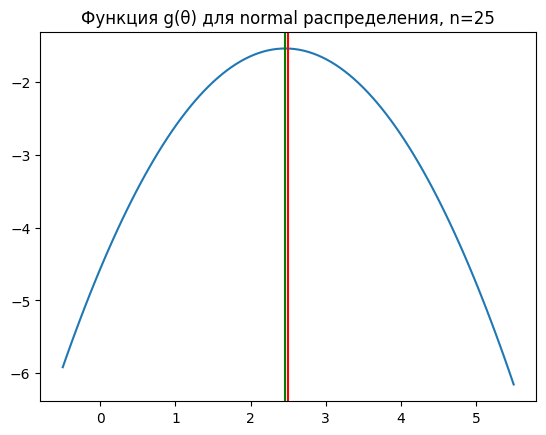

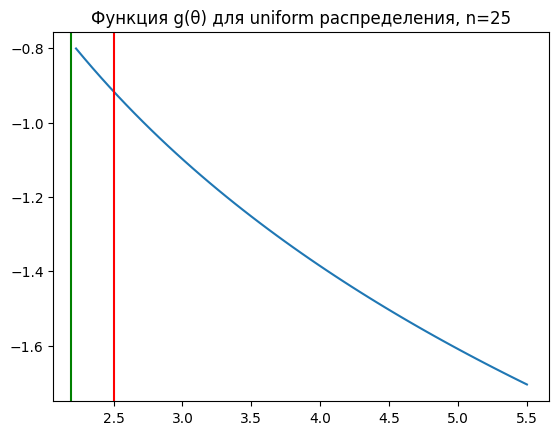

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#вариант X1, . . . , Xn ∼ N (θ, 1)
def generate_sample(n, theta, dist_type):
    if dist_type == 'normal':
        sample = np.random.normal(theta, 1, n) #сразу массив выдает!
    else:
        sample = np.random.uniform(0, theta, n)
    return sample
    
def log_likelihood_normal(data, theta):
    n = len(data)
    log_lik = -n/2 * np.log(2 * np.pi) - np.sum((data - theta)**2) / 2
    return log_lik
    
def log_likelihood_uniform(data, theta):
    n = len(data)
    if theta >= np.max(data):
        return -n * np.log(theta)
    else:
        return -np.inf
    
def plot_likelihood(data, dist_type, theta):
    n = len(data)
    theta_values = np.linspace(theta - 3, theta + 3, 100)
    g_values = []
    if dist_type == 'normal':
        mle = np.mean(data)
    else:
        mle = np.max(data)
    for t in theta_values:
        if dist_type == 'normal':
            log_lik = log_likelihood_normal(data, t)
            g = log_lik/n
        else:
            log_lik = log_likelihood_uniform(data, t)
            g = log_lik/n
        g_values.append(g)

    plt.plot(theta_values, g_values)
    plt.axvline(x=theta, color = 'red')
    plt.axvline(x=mle, color = 'green')
    plt.title(f'Функция g(θ) для {dist_type} распределения, n={n}')
    plt.show()
        
n = 25
theta = 2.5
sample1 = generate_sample(n, theta, 'normal')
plot_likelihood(sample1, 'normal', theta)
sample2 = generate_sample(n, theta, 'uniform')
plot_likelihood(sample2, 'uniform', theta)

№3. Xi имеют распределение Коши, где неизвестный параметр масштаб. Построить ОМП по выборке размера n = 5, 10, 20, 50, 100. Для каждого n генерировать
k = 500 выборок X1, . . . , Xn, для каждой найти значение ОМП и θb, найти выборочное среднее и
выборочную дисперсию ОМП и θb и сравнить их. Здесь θb – половина интерквартильного размаха, то есть полуразность верхнего и
нижнего выборочного квартиля.

Размер выборки 5, ОМП 0.9179375463043078, Среднее 1.1929972888867537 , Дисперсия 1.1193201130324837
 Половина интерквартильного размаха 0.7462838707411932, Среднее 1.0528898878476907, Дисперсия 1.397319582676881


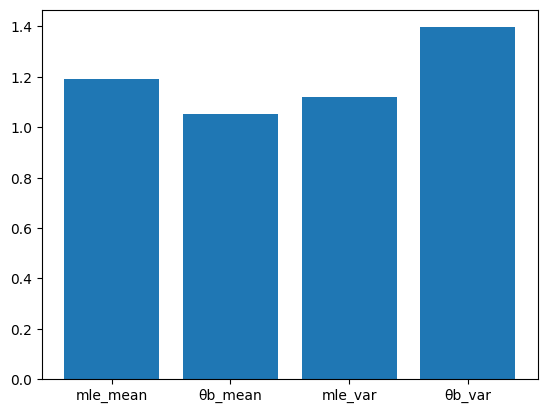

Размер выборки 10, ОМП 1.63805586887821, Среднее 1.076651956335821 , Дисперсия 0.25274572684314583
 Половина интерквартильного размаха 1.064152206026275, Среднее 1.0604327636431998, Дисперсия 0.520008464735457


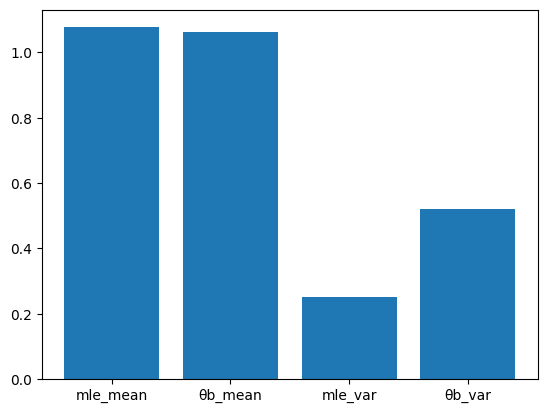

Размер выборки 20, ОМП 0.5306517209220543, Среднее 1.057920661576777 , Дисперсия 0.11243302023795491
 Половина интерквартильного размаха 0.49516341864847335, Среднее 1.041262868795765, Дисперсия 0.15463883116714872


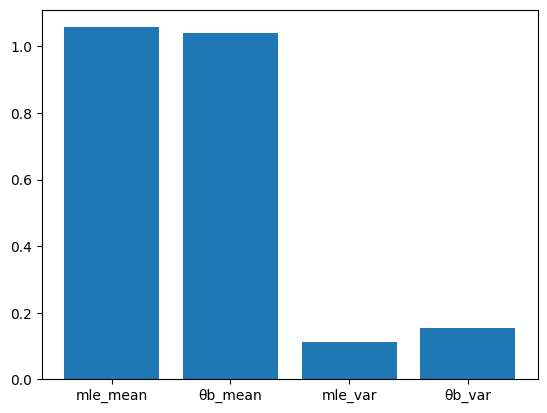

Размер выборки 50, ОМП 0.8887941936062004, Среднее 1.0170460622996769 , Дисперсия 0.041603241455700074
 Половина интерквартильного размаха 0.908669189756135, Среднее 1.0103531214422075, Дисперсия 0.056597227909369975


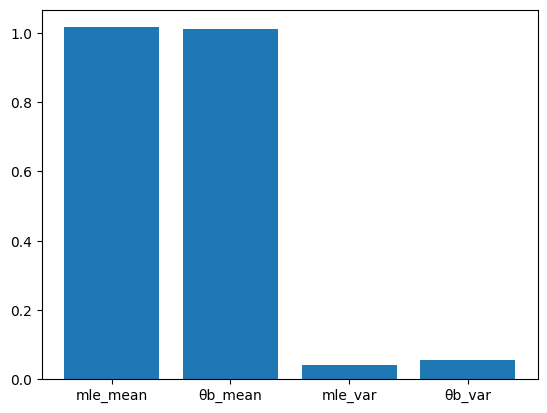

Размер выборки 100, ОМП 0.8811587226223618, Среднее 1.0106123052855898 , Дисперсия 0.018487176125265424
 Половина интерквартильного размаха 0.8948717722944546, Среднее 1.0080219673713275, Дисперсия 0.023757754279220937


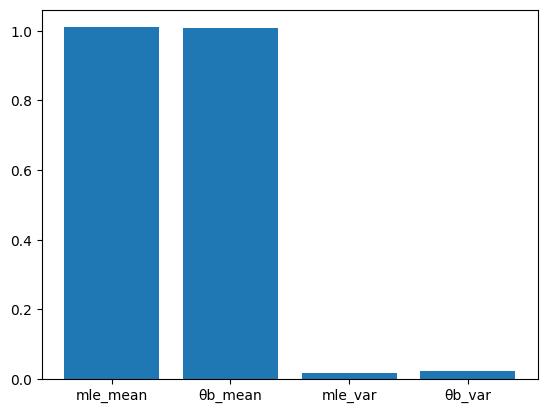

In [6]:
from scipy.optimize import minimize
from scipy.stats import cauchy

def log_likelihood_cauchy(theta, data):
    n = len(data)
    if theta < 0:
        return np.inf
    return -n * np.log(np.pi) - n * np.log(theta) - np.sum(np.log(1 + (data/theta)**2)) #это уже ln правдоподобия

def mle_cauchy(initial_theta, data):
    result = minimize(lambda th: -log_likelihood_cauchy(th, data), initial_theta, bounds=[(0.001, None)])  #массив возвращает
    return result.x[0]

def iqr_cauchy(sample): #IQR = InterQuartile Range = Интерквартильный размах
    Q1 = np.quantile(sample, 0.25)
    Q3 = np.quantile(sample, 0.75)
    iqr = (Q3 - Q1)/2
    return iqr

true_theta = 1.0  
sample_sizes = [5, 10, 20, 50, 100]
k = 500 

for n in sample_sizes:
    mle_estimates = np.zeros(k)
    iqr_estimates = np.zeros(k)
    
    for i in range(k):
        sample = cauchy.rvs(loc=0, scale=true_theta, size=n)
        initial_theta = np.median(abs(sample))
        mle = mle_cauchy(initial_theta, sample)
        iqr = iqr_cauchy(sample)
        mle_estimates[i] = mle
        iqr_estimates[i] = iqr
    mle_mean = np.mean(mle_estimates)
    iqr_mean = np.mean(iqr_estimates)
    mle_var = np.var(mle_estimates)
    iqr_var = np.var(iqr_estimates)
    print(f"Размер выборки {n}, ОМП {mle}, Среднее {mle_mean} , Дисперсия {mle_var}\n Половина интерквартильного размаха {iqr}, Среднее {iqr_mean}, Дисперсия {iqr_var}")
    #Визуализируем как-нибудь
    plt.bar(['mle_mean', 'θb_mean', 'mle_var', 'θb_var'], [mle_mean, iqr_mean, mle_var, iqr_var])#тут сначала координаты, а потом высота столбцов
    plt.show()


X1, . . . , Xn ∼ N (0, θ), θb1 – ОММ, θb2 – ОМС, θb3 – ОМП.
(a) Построить по выборке θbi, i = 1, 2, 3 (найти численно или аналитически, как удобнее).
(b) Сравнить, какая из оценок чаще оказывается ближе к θ при разных n, смоделировав для
этого по 1000 реализаций (для каждого n).
(c) Построить гистограммы для √n(θbi − θ) на одном графике, сравнить разбросы.

Размер выборки 5, ОМП 1.7805492329121306, Среднее 1.025255756425342 , Дисперсия 0.4096692723792132
 ОММ 1.7805492329121306, Среднее 1.025255756425342, Дисперсия 0.4096692723792132/n ОМС 1.0155975960970518, Среднее 0.8352652946071139 , Дисперсия 0.3470977211042779


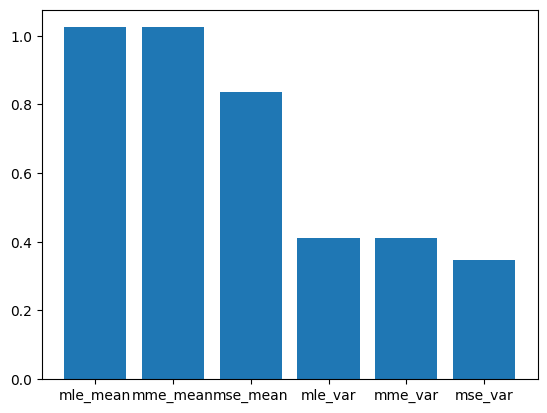

Размер выборки 10, ОМП 0.6484300043152601, Среднее 1.0011651158585235 , Дисперсия 0.19321085875199712
 ОММ 0.6484300043152601, Среднее 1.0011651158585235, Дисперсия 0.19321085875199712/n ОМС 0.5901543117055128, Среднее 0.9046418454353821 , Дисперсия 0.17969148363508847


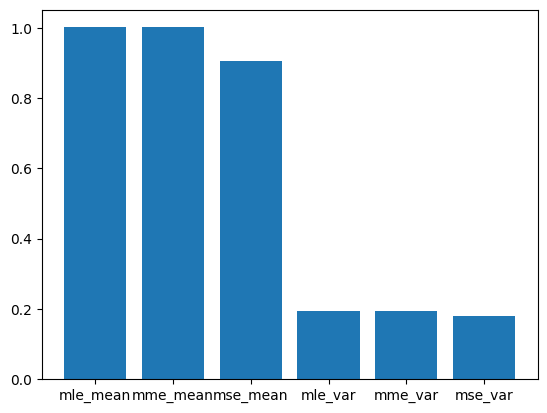

Размер выборки 20, ОМП 0.9050521501704945, Среднее 1.0035158225857848 , Дисперсия 0.09596574559524604
 ОММ 0.9050521501704945, Среднее 1.0035158225857848, Дисперсия 0.09596574559524604/n ОМС 0.9047196789019338, Среднее 0.9570366417802952 , Дисперсия 0.09264435156676126


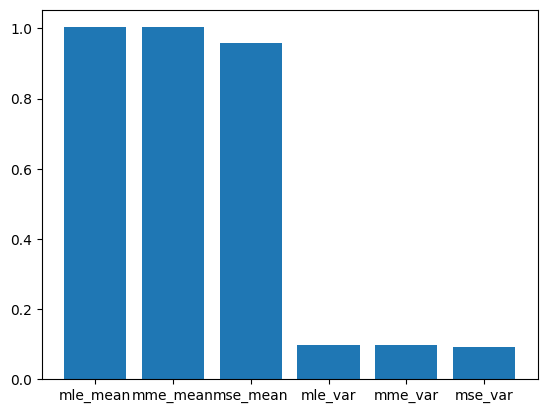

Размер выборки 50, ОМП 1.2319297743499191, Среднее 0.9969174631750477 , Дисперсия 0.03963416543101642
 ОММ 1.2319297743499191, Среднее 0.9969174631750477, Дисперсия 0.03963416543101642/n ОМС 1.229652896140694, Среднее 0.975712788997143 , Дисперсия 0.0379651387086345


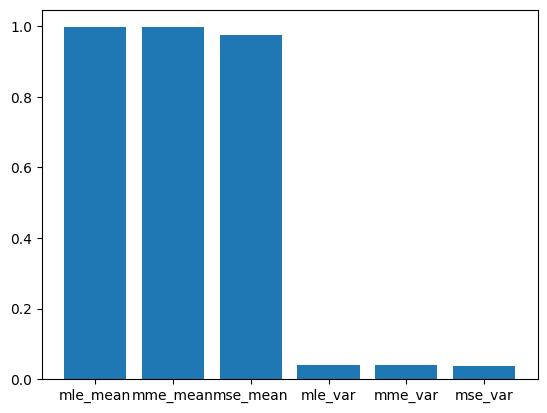

Размер выборки 100, ОМП 0.8365233706164119, Среднее 1.0027681209223962 , Дисперсия 0.019169188265326622
 ОММ 0.8365233706164119, Среднее 1.0027681209223962, Дисперсия 0.019169188265326622/n ОМС 0.8172365780772836, Среднее 0.994028331263474 , Дисперсия 0.01907413633495556


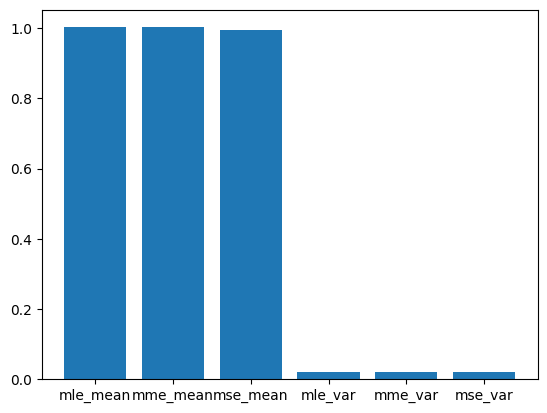

In [11]:
def ml_estimate(data):
    #ln(L(θ)) = -n/2 *ln(2*pi*θ) - sum(xi**2/2*θ) -> тут омп очев
    n = len(data)
    return np.sum(data**2)/n

def mm_estimate(data):
    #уравнение моментов такое data**2.mean = var = θ
    return np.mean(data**2)

def ms_estimate(data, initial_theta=None):
    #D = F(x_(1);θ) * [F(x_(2);θ) - F(x_(1);θ)] * ... * [1 - F(x_(n);θ)] надо максимизировать
    n = len(data)
    data_sorted = np.sort(data)
    #для N(0,θ) функция распределния(от х) такая же как у стандпртного нормального только от x/sqrt(θ), нормировали короче 
    F_data = norm.cdf(data_sorted/np.sqrt(theta))
    #Теперь логарифмы разностей
    def lnD(theta):
        if theta <= 0:
            return -np.inf    
        diffs = np.zeros(n) 
        diffs[0] = F_data[0]  
        for i in range(1, n):
            diffs[i] = F_data[i] - F_data[i-1]#или существует такая чудная функция np.diff(F, prepend=0, append=1) - все разности
        diffs[n-1] = 1 - F_data[-1]
        return np.sum(np.log(diffs))
    result = minimize(lambda th: -lnD(th), initial_theta, bounds=[(1e-10, None)])
    return result.x[0]

true_theta = 1.0  
sample_sizes = [5, 10, 20, 50, 100]
k = 1000 
for n in sample_sizes:
    mle_estimates = np.zeros(k)
    mme_estimates = np.zeros(k)
    mse_estimates = np.zeros(k)
    
    for i in range(k):
        sample = norm.rvs(loc=0, scale=true_theta, size=n)
        initial_theta = np.var(sample)
        mle = ml_estimate(sample)
        mme = mm_estimate(sample)
        mse = ms_estimate(sample, initial_theta)        
        mle_estimates[i] = mle
        mme_estimates[i] = mme
        mse_estimates[i] = mse
    mle_mean = np.mean(mle_estimates)
    mme_mean = np.mean(mme_estimates)
    mse_mean = np.mean(mse_estimates)

    mle_var = np.var(mle_estimates)
    mme_var = np.var(mme_estimates)
    mse_var = np.var(mse_estimates)

    print(f"Размер выборки {n}, ОМП {mle}, Среднее {mle_mean} , Дисперсия {mle_var}\n ОММ {mme}, Среднее {mme_mean}, Дисперсия {mme_var}/n ОМС {mse}, Среднее {mse_mean} , Дисперсия {mse_var}")
    #Визуализируем как-нибудь
    plt.bar(['mle_mean', 'mme_mean', 'mse_mean', 'mle_var', 'mme_var', 'mse_var'], [mle_mean, mme_mean, mse_mean, mle_var, mme_var, mse_var])#тут сначала координаты, а потом высота столбцов
    plt.show()